In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt

In [143]:
df = pd.read_csv('Fever-1.csv')
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [144]:
df.shape

(36, 4)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [146]:
df.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


In [147]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [148]:
df.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [149]:
df.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

# 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.
The Null Hypothesis Ho = The mean of 'Relief' variable is same with all three levels for variable A The Alternate Hypothesis Ha = The mean of 'Relief' variable is different atleast in one levelfor variable A

The Null Hypothesis Ho = The mean of 'Relief' variable is same with all three levels for variable B The Alternate Hypothesis Ha = The mean of 'Relief' variable is different atleast in one levelfor variable B

# 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [150]:
formula = 'Relief ~ A'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df   sum_sq     mean_sq          F        PR(>F)
A          1.0  212.415  212.415000  44.494409  1.175871e-07
Residual  34.0  162.315    4.773971        NaN           NaN


# Since the P-value is less than 0.05 so we can say ,we can reject the Null Hypothesis.

# 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.


In [151]:
formula = 'Relief ~ B'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df   sum_sq     mean_sq          F    PR(>F)
B          1.0  113.535  113.535000  14.778958  0.000505
Residual  34.0  261.195    7.682206        NaN       NaN


# Since the p-value less than 0.05 so we can say,we can reject the Null Hypothesis



# 1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is an interaction between two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]¶

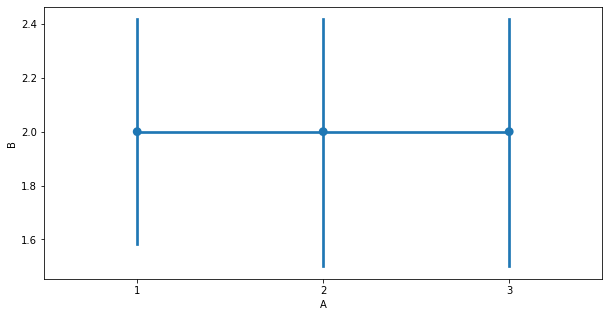

In [152]:
plt.figure(figsize=(10,5))
sns.pointplot(x = 'A', y = 'B', data = df,)
plt.show()

# As the given plot shows that both the treatments A and B have interaction with each other

# 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

In [153]:
formula = 'Relief ~ A + B'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df   sum_sq     mean_sq           F        PR(>F)
A          1.0  212.415  212.415000  143.700185  1.437294e-13
B          1.0  113.535  113.535000   76.807196  3.952700e-10
Residual  33.0   48.780    1.478182         NaN           NaN


# Since both the variables have pvalue less than 0.05 so we reject the null hypothesis

# 1.6) Mention the business implications of performing ANOVA for this particular case study

# After performing Anova we can see that there will be a change in hours of relief at different levels in compound 'A' and 'B'and also if we change the levels in compounds 'A' and/or 'B', there is a change in hours of relief.

# Problem 2

In [155]:
hg=pd.read_csv('Education - Post 12th Standard-1.csv')
hg.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [156]:
hg.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [11]:
hg.shape

(777, 18)

In [12]:
hg.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [13]:
hg.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [26]:
print("hg",hg.mean())

hg Apps            3001.638353
Accept          2018.804376
Enroll           779.972973
Top10perc         27.558559
Top25perc         55.796654
F.Undergrad     3699.907336
P.Undergrad      855.298584
Outstate       10440.669241
Room.Board      4357.526384
Books            549.380952
Personal        1340.642214
PhD               72.660232
Terminal          79.702703
S.F.Ratio         14.089704
perc.alumni       22.743887
Expend          9660.171171
Grad.Rate         65.463320
dtype: float64


In [27]:
print("hg",hg.median())

hg Apps           1558.0
Accept         1110.0
Enroll          434.0
Top10perc        23.0
Top25perc        54.0
F.Undergrad    1707.0
P.Undergrad     353.0
Outstate       9990.0
Room.Board     4200.0
Books           500.0
Personal       1200.0
PhD              75.0
Terminal         82.0
S.F.Ratio        13.6
perc.alumni      21.0
Expend         8377.0
Grad.Rate        65.0
dtype: float64


In [28]:
print("hg", hg.mode())

hg                               Names    Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University   440.0   452.0   177.0       20.0   
1                Adelphi University   663.0     NaN   295.0        NaN   
2                    Adrian College  1006.0     NaN     NaN        NaN   
3               Agnes Scott College     NaN     NaN     NaN        NaN   
4         Alaska Pacific University     NaN     NaN     NaN        NaN   
..                              ...     ...     ...     ...        ...   
772         Worcester State College     NaN     NaN     NaN        NaN   
773               Xavier University     NaN     NaN     NaN        NaN   
774  Xavier University of Louisiana     NaN     NaN     NaN        NaN   
775                 Yale University     NaN     NaN     NaN        NaN   
776    York College of Pennsylvania     NaN     NaN     NaN        NaN   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0         55.0        500.0        

In [29]:
print("hg_quantile(25%)", hg.quantile(q=0.25))

hg_quantile(25%) Apps            776.0
Accept          604.0
Enroll          242.0
Top10perc        15.0
Top25perc        41.0
F.Undergrad     992.0
P.Undergrad      95.0
Outstate       7320.0
Room.Board     3597.0
Books           470.0
Personal        850.0
PhD              62.0
Terminal         71.0
S.F.Ratio        11.5
perc.alumni      13.0
Expend         6751.0
Grad.Rate        53.0
Name: 0.25, dtype: float64


In [30]:
print("hg_quantile(50%)",hg.quantile(q=0.50))

hg_quantile(50%) Apps           1558.0
Accept         1110.0
Enroll          434.0
Top10perc        23.0
Top25perc        54.0
F.Undergrad    1707.0
P.Undergrad     353.0
Outstate       9990.0
Room.Board     4200.0
Books           500.0
Personal       1200.0
PhD              75.0
Terminal         82.0
S.F.Ratio        13.6
perc.alumni      21.0
Expend         8377.0
Grad.Rate        65.0
Name: 0.5, dtype: float64


In [31]:
print("hg_quantile(75%)",hg.quantile(q=0.75))

hg_quantile(75%) Apps            3624.0
Accept          2424.0
Enroll           902.0
Top10perc         35.0
Top25perc         69.0
F.Undergrad     4005.0
P.Undergrad      967.0
Outstate       12925.0
Room.Board      5050.0
Books            600.0
Personal        1700.0
PhD               85.0
Terminal          92.0
S.F.Ratio         16.5
perc.alumni       31.0
Expend         10830.0
Grad.Rate         78.0
Name: 0.75, dtype: float64


In [33]:
hg.cov()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.497846e+07,8.949860e+06,3.045256e+06,23132.773138,26952.663479,1.528970e+07,2.346620e+06,7.809704e+05,7.000729e+05,84703.752639,4.683468e+05,24689.433666,21053.067602,1465.060576,-4327.122381,5.246171e+06,9756.421641
Accept,8.949860e+06,6.007960e+06,2.076268e+06,8321.124872,12013.404757,1.039358e+07,1.646670e+06,-2.539623e+05,2.443471e+05,45942.807867,3.335566e+05,14238.201489,12182.093828,1709.838189,-4859.487022,1.596272e+06,2834.162918
Enroll,3.045256e+06,2.076268e+06,8.633684e+05,2971.583415,4172.592435,4.347530e+06,7.257907e+05,-5.811885e+05,-4.099706e+04,17291.199742,1.767380e+05,5028.961166,4217.086027,872.684773,-2081.693787,3.113454e+05,-356.587977
Top10perc,2.313277e+04,8.321125e+03,2.971583e+03,311.182456,311.630480,1.208911e+04,-2.829475e+03,3.990718e+04,7.186706e+03,346.177405,-1.114551e+03,153.184870,127.551581,-26.874525,99.567208,6.087931e+04,149.992164
Top25perc,2.695266e+04,1.201340e+04,4.172592e+03,311.630480,392.229216,1.915895e+04,-1.615412e+03,3.899243e+04,7.199904e+03,377.759266,-1.083605e+03,176.518449,153.002612,-23.097199,102.550946,5.454648e+04,162.371398
F.Undergrad,1.528970e+07,1.039358e+07,4.347530e+06,12089.113681,19158.952782,2.352658e+07,4.212910e+06,-4.209843e+06,-3.664582e+05,92535.764728,1.041709e+06,25211.784197,21424.241746,5370.208581,-13791.929691,4.724040e+05,-6563.307527
P.Undergrad,2.346620e+06,1.646670e+06,7.257907e+05,-2829.474981,-1615.412144,4.212910e+06,2.317799e+06,-1.552704e+06,-1.023919e+05,20410.446674,3.297324e+05,3706.756219,3180.596615,1401.302563,-5297.337090,-6.643512e+05,-6721.062488
Outstate,7.809704e+05,-2.539623e+05,-5.811885e+05,39907.179832,38992.427500,-4.209843e+06,-1.552704e+06,1.618466e+07,2.886597e+06,25808.242145,-8.146737e+05,25157.515051,24164.147673,-8835.253539,28229.553066,1.413324e+07,39479.681796
Room.Board,7.000729e+05,2.443471e+05,-4.099706e+04,7186.705605,7199.903568,-3.664582e+05,-1.023919e+05,2.886597e+06,1.202743e+06,23170.313390,-1.480838e+05,5895.034749,6047.299735,-1574.205914,3701.431379,2.873308e+06,8005.360183
Books,8.470375e+04,4.594281e+04,1.729120e+04,346.177405,377.759266,9.253576e+04,2.041045e+04,2.580824e+04,2.317031e+04,27259.779946,2.004303e+04,72.534242,242.963918,-20.867207,-82.263132,9.691258e+04,3.008837


In [34]:
hg.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [40]:
hg.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

# 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

# Uni-variate analysis


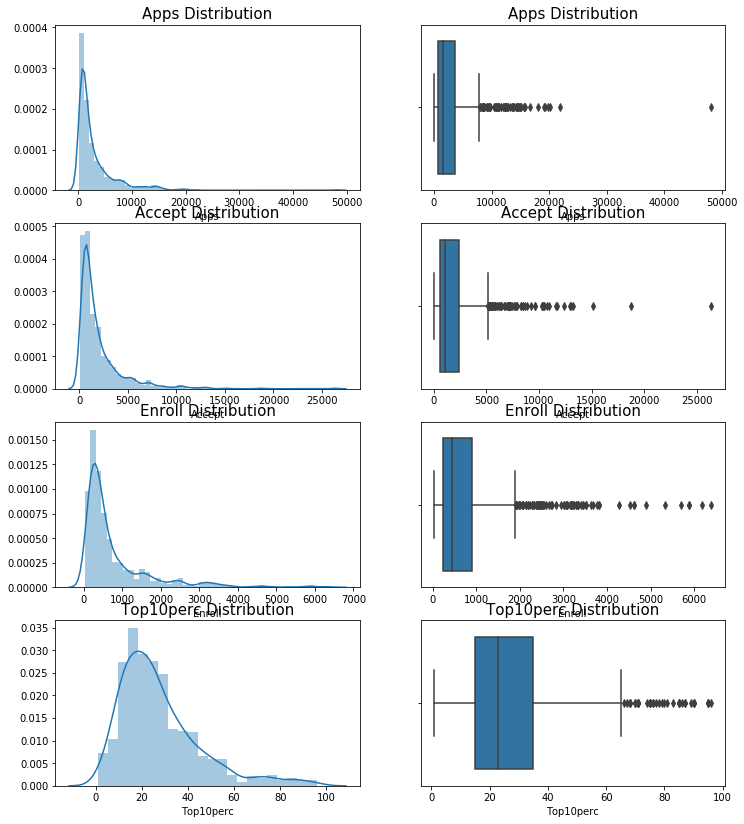

In [48]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(hg['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=15)

a = sns.boxplot(hg['Apps'] , orient = "g" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(hg['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=15)

a = sns.boxplot(hg['Accept'] , orient = "g" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=15)

a = sns.distplot(hg['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=15)

a = sns.boxplot(hg['Enroll'] , orient = "g" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=15)

a = sns.distplot(hg['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=15)

a = sns.boxplot(hg['Top10perc'] , orient = "g" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=15)

plt.show()

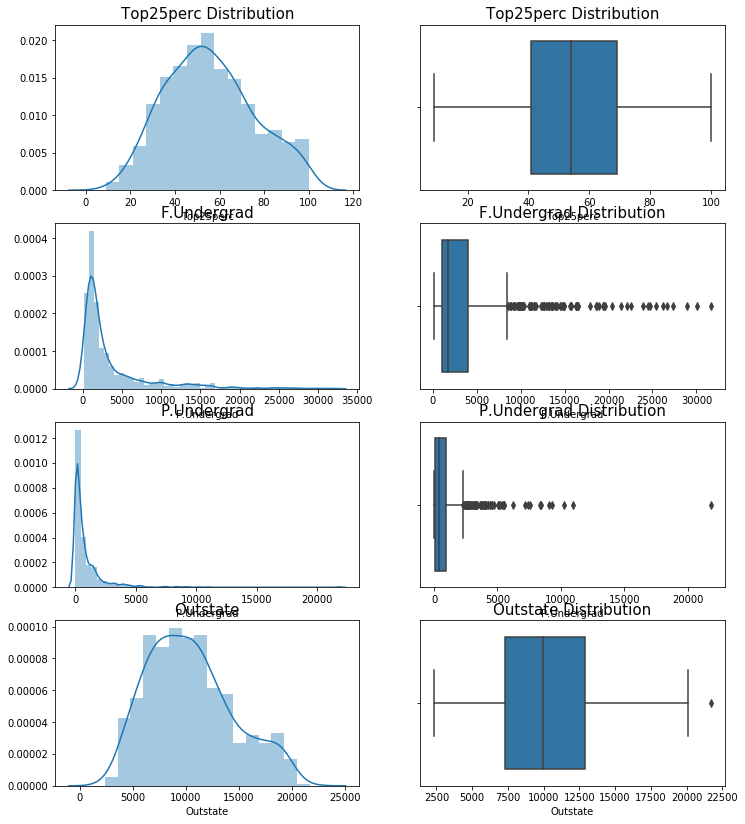

In [51]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(hg['Top25perc'] , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.boxplot(hg['Top25perc'] , orient = "g" , ax=axes[0][1])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.distplot(hg['F.Undergrad'] , ax=axes[1][0])
a.set_title("F.Undergrad",fontsize=15)

a = sns.boxplot(hg['F.Undergrad'] , orient = "g" , ax=axes[1][1])
a.set_title("F.Undergrad Distribution",fontsize=15)

a = sns.distplot(hg['P.Undergrad'] , ax=axes[2][0])
a.set_title("P.Undergrad",fontsize=15)

a = sns.boxplot(hg['P.Undergrad'] , orient = "g" , ax=axes[2][1])
a.set_title("P.Undergrad Distribution",fontsize=15)


a = sns.distplot(hg['Outstate'] , ax=axes[3][0])
a.set_title("Outstate",fontsize=15)

a = sns.boxplot(hg['Outstate'] , orient = "g" , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=15)

plt.show()

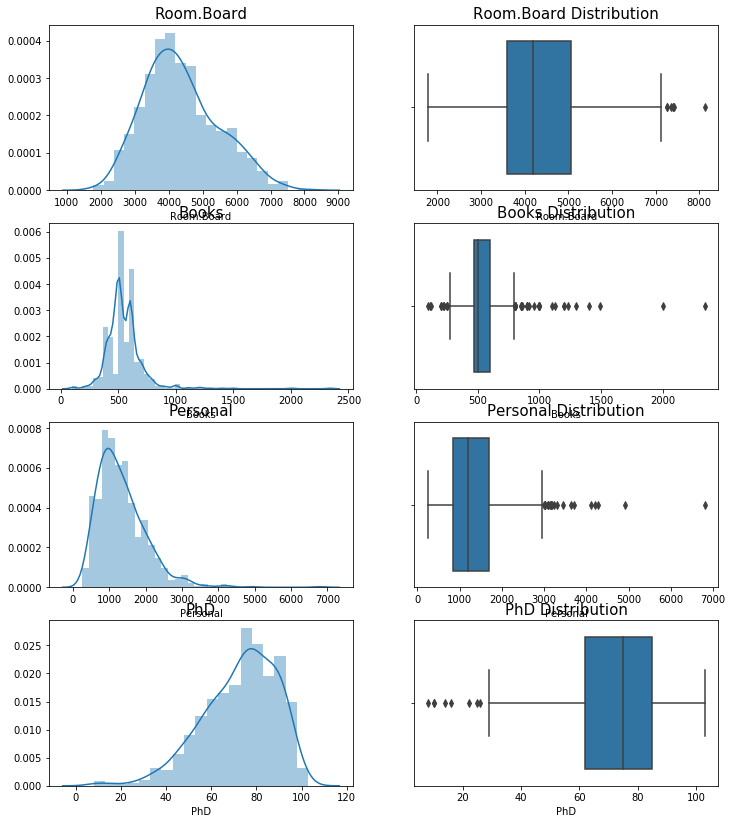

In [53]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)


a = sns.distplot(hg['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board",fontsize=15)

a = sns.boxplot(hg['Room.Board'] , orient = "g" , ax=axes[0][1])
a.set_title("Room.Board Distribution",fontsize=15)


a = sns.distplot(hg['Books'] , ax=axes[1][0])
a.set_title("Books",fontsize=15)

a = sns.boxplot(hg['Books'] , orient = "g" , ax=axes[1][1])
a.set_title("Books Distribution",fontsize=15)

a = sns.distplot(hg['Personal'] , ax=axes[2][0])
a.set_title("Personal",fontsize=15)

a = sns.boxplot(hg['Personal'] , orient = "g" , ax=axes[2][1])
a.set_title("Personal Distribution",fontsize=15)


a = sns.distplot(hg['PhD'] , ax=axes[3][0])
a.set_title("PhD",fontsize=15)

a = sns.boxplot(hg['PhD'] , orient = "g" , ax=axes[3][1])
a.set_title("PhD Distribution",fontsize=15)

plt.show()

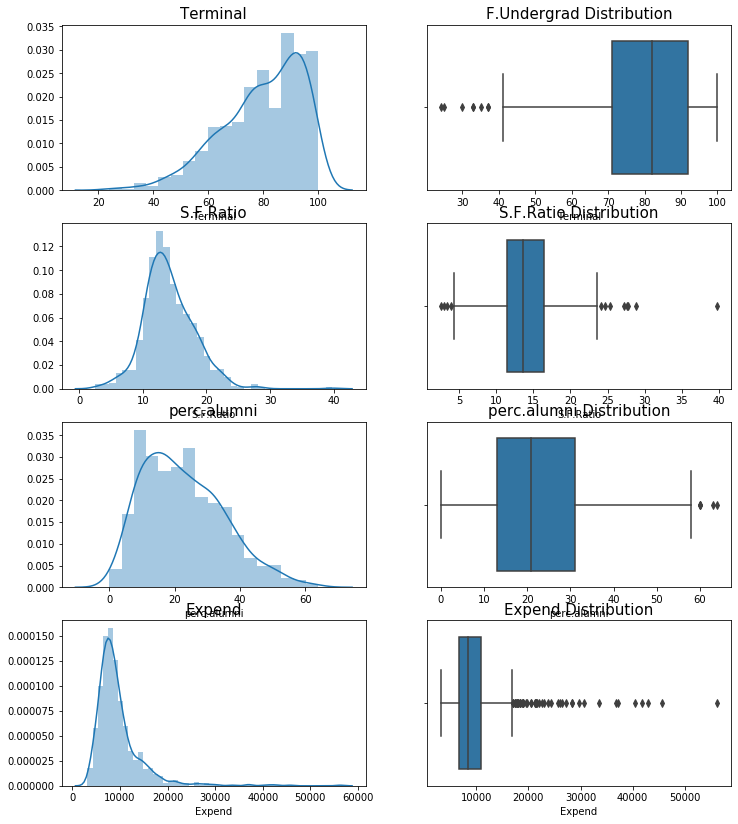

In [54]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(hg['Terminal'] , ax=axes[0][0])
a.set_title("Terminal",fontsize=15)

a = sns.boxplot(hg['Terminal'] , orient = "g" , ax=axes[0][1])
a.set_title("F.Undergrad Distribution",fontsize=15)

a = sns.distplot(hg['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio",fontsize=15)

a = sns.boxplot(hg['S.F.Ratio'] , orient = "g" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=15)

a = sns.distplot(hg['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni",fontsize=15)

a = sns.boxplot(hg['perc.alumni'] , orient = "g" , ax=axes[2][1])
a.set_title("perc.alumni Distribution",fontsize=15)


a = sns.distplot(hg['Expend'] , ax=axes[3][0])
a.set_title("Expend",fontsize=15)

a = sns.boxplot(hg['Expend'] , orient = "g" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=15)

plt.show()

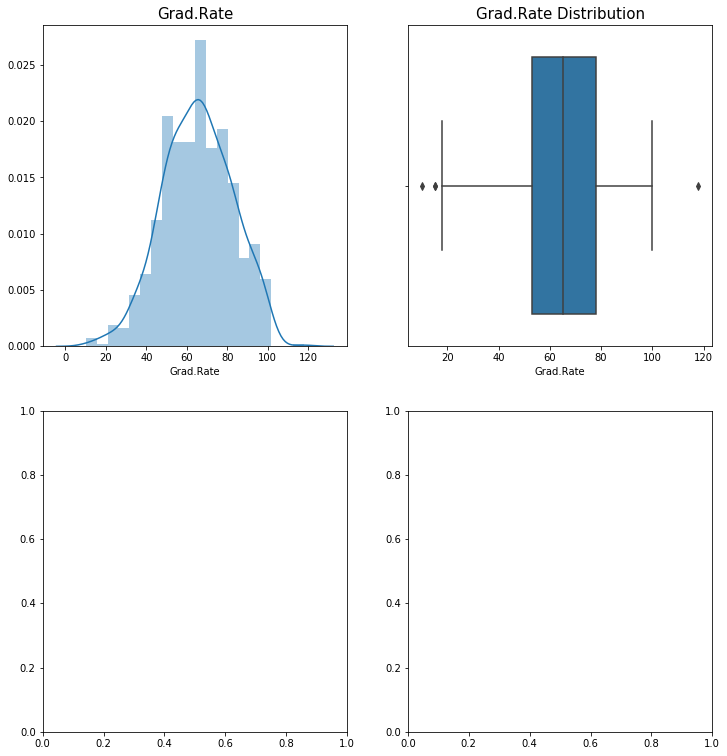

In [65]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,13)


a = sns.distplot(hg['Grad.Rate'] , ax=axes[0][0])
a.set_title("Grad.Rate",fontsize=15)

a = sns.boxplot(hg['Grad.Rate'] , orient = "g" , ax=axes[0][1])
a.set_title("Grad.Rate Distribution",fontsize=15)

plt.show()

# We observe that except the 'Top25perc',all variables have Outliers.

# Bi-Variate Analysis

In [67]:
hg.corr(method = 'pearson')

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


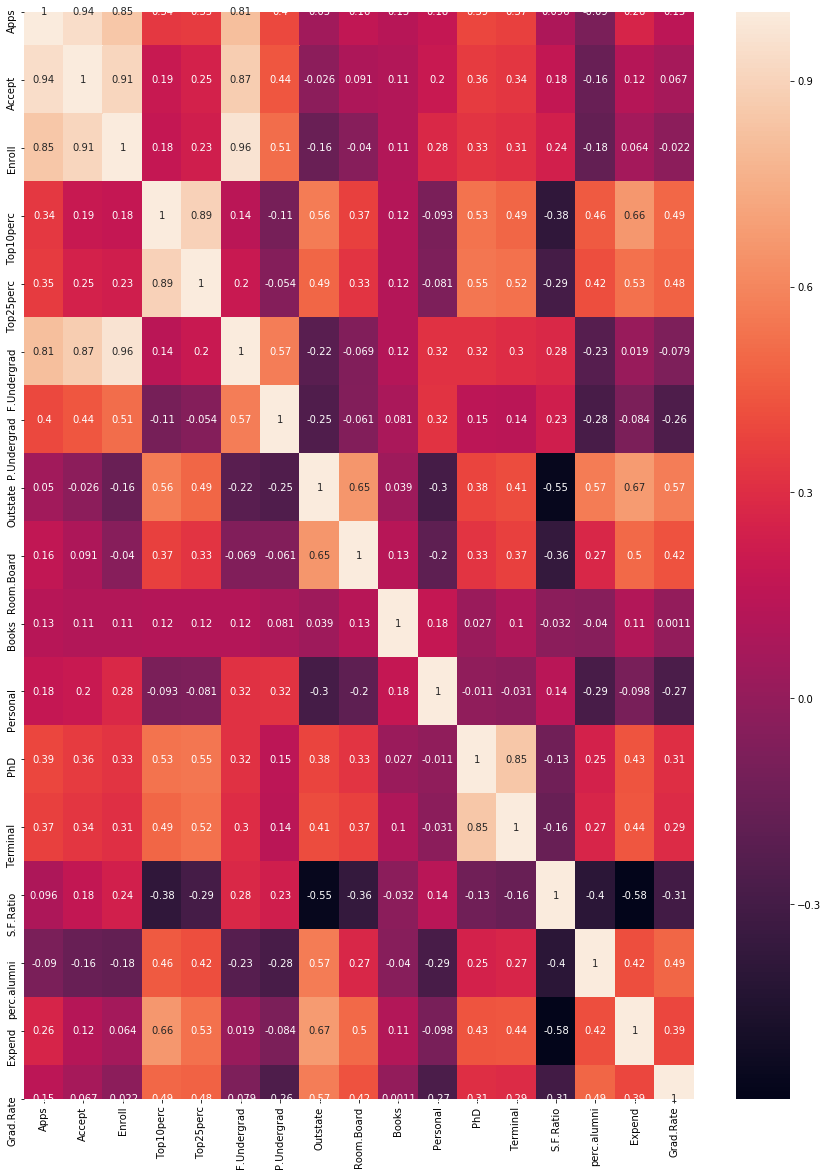

In [71]:
plt.figure(figsize = (15,20))
sns.heatmap(hg.corr(),annot = True)

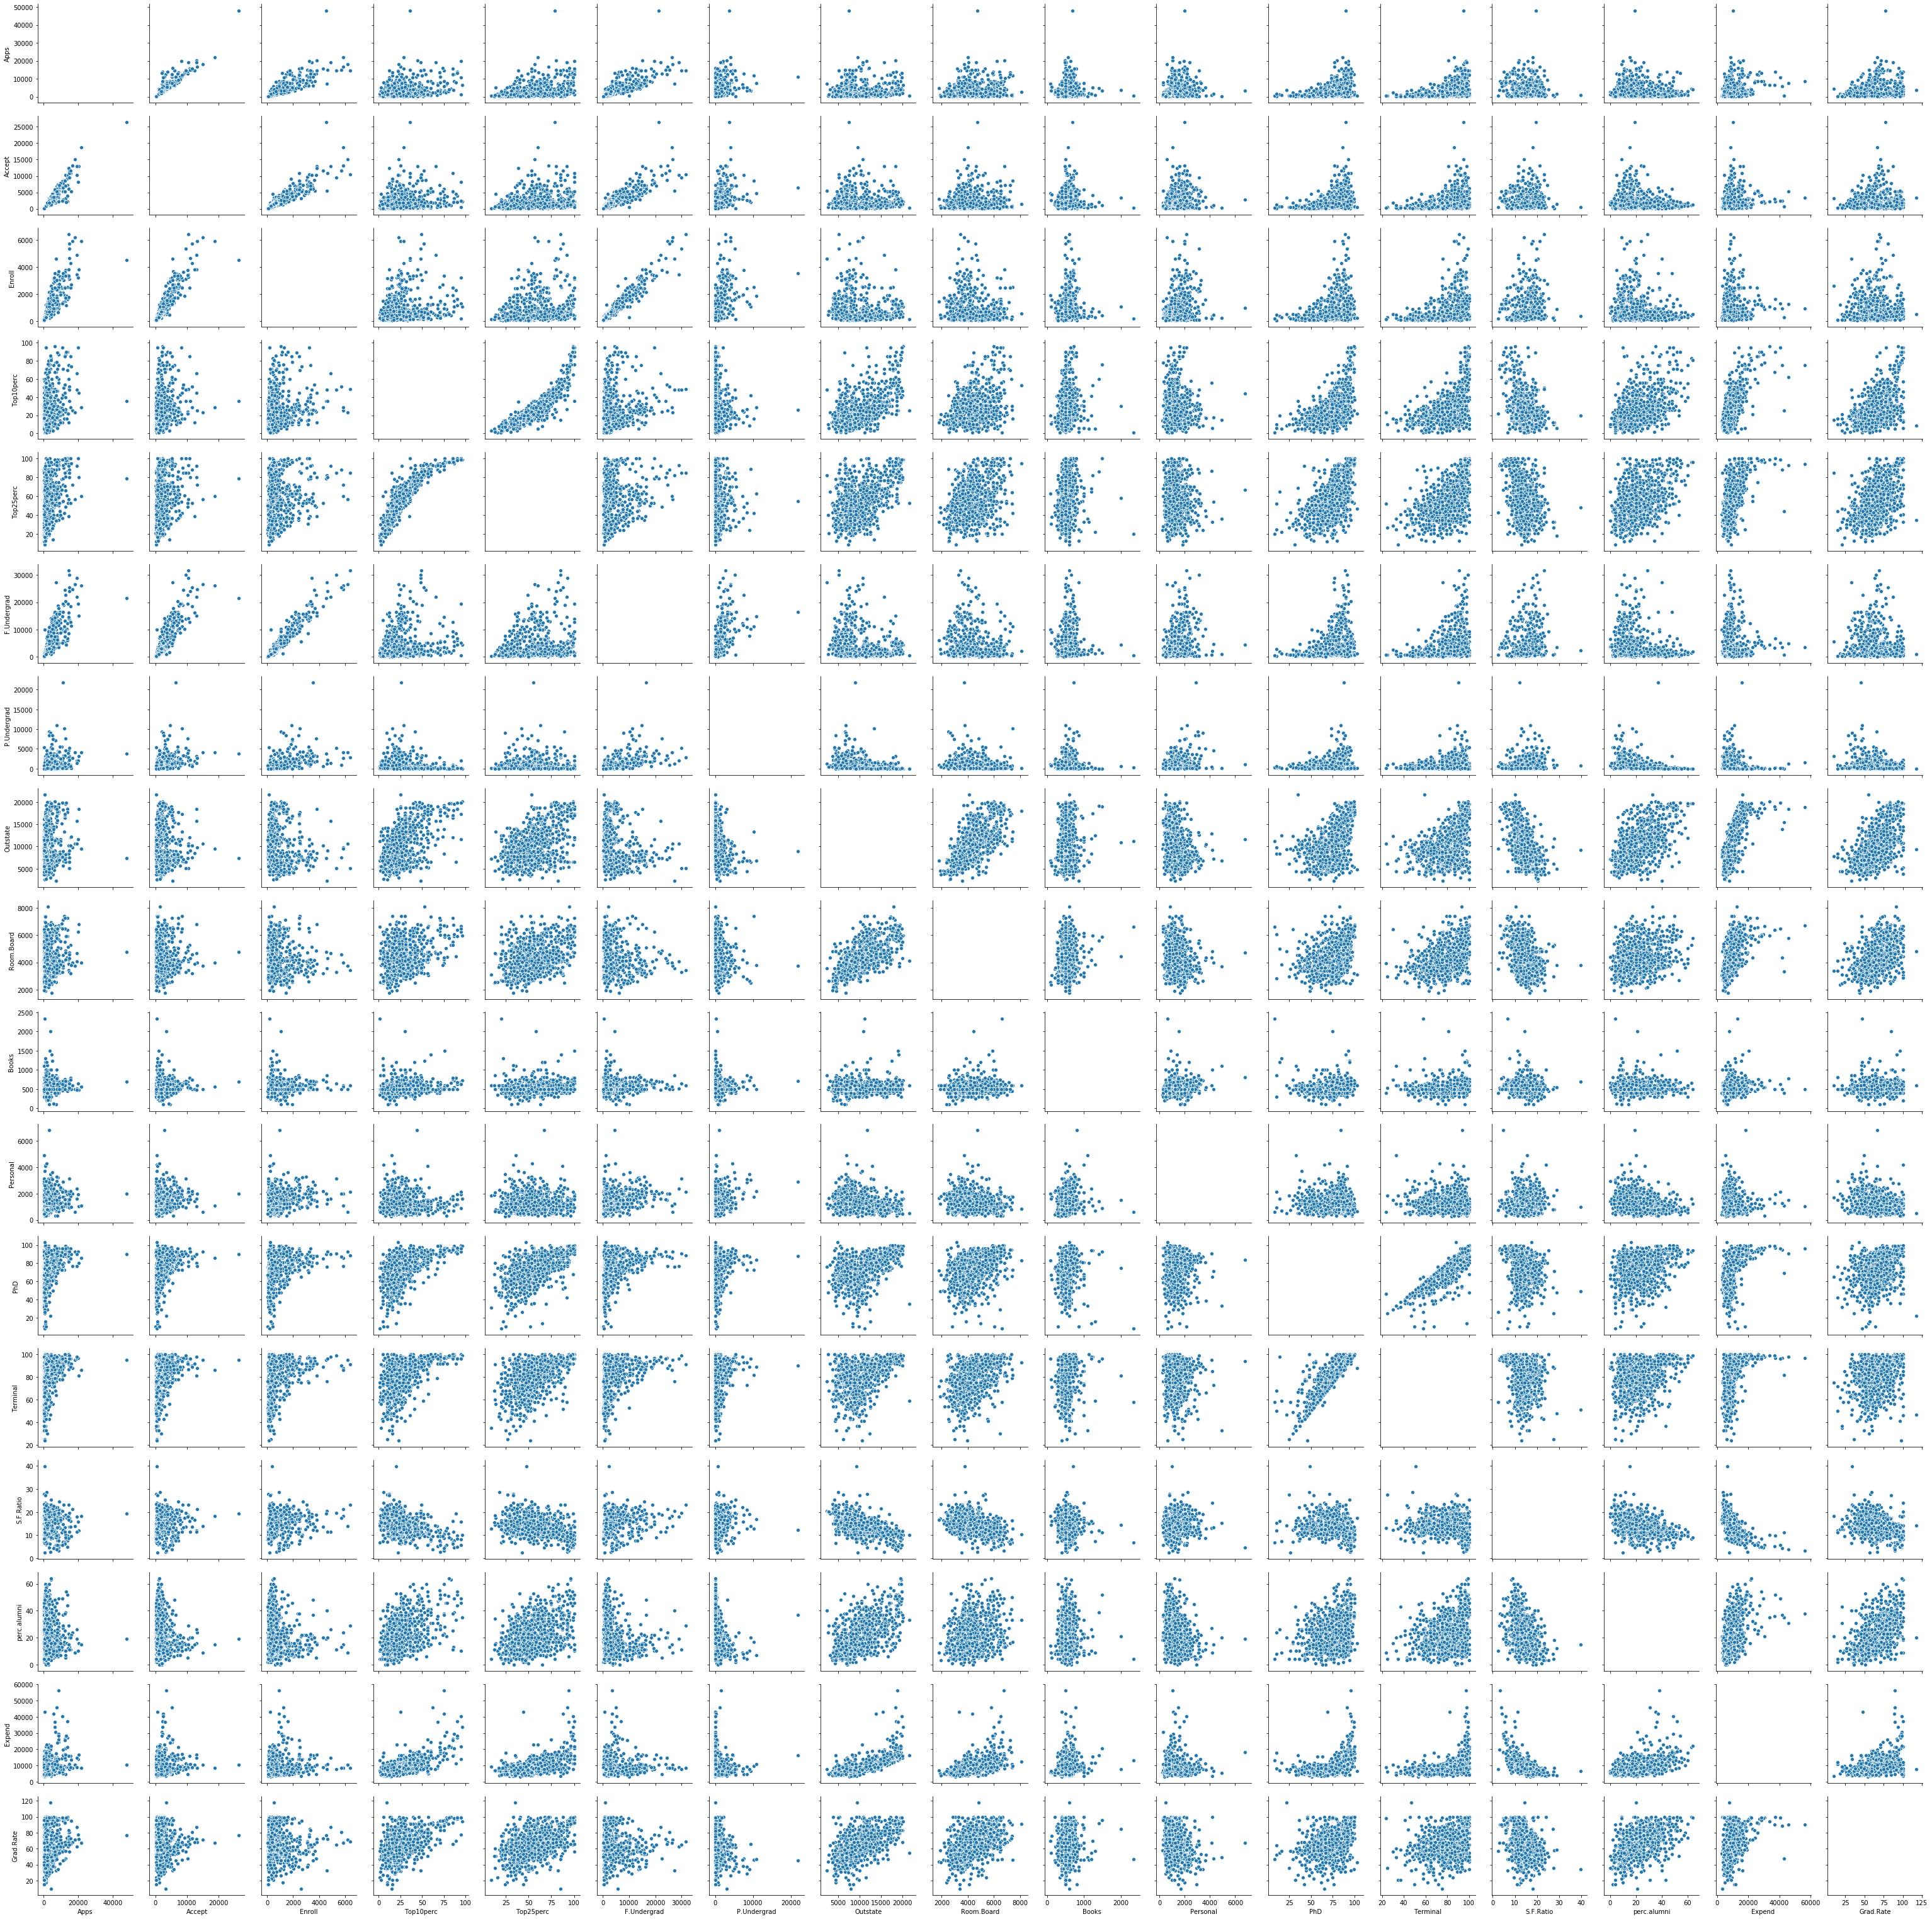

In [76]:
sns.pairplot(data = hg, diag_kind = 'Kde' )

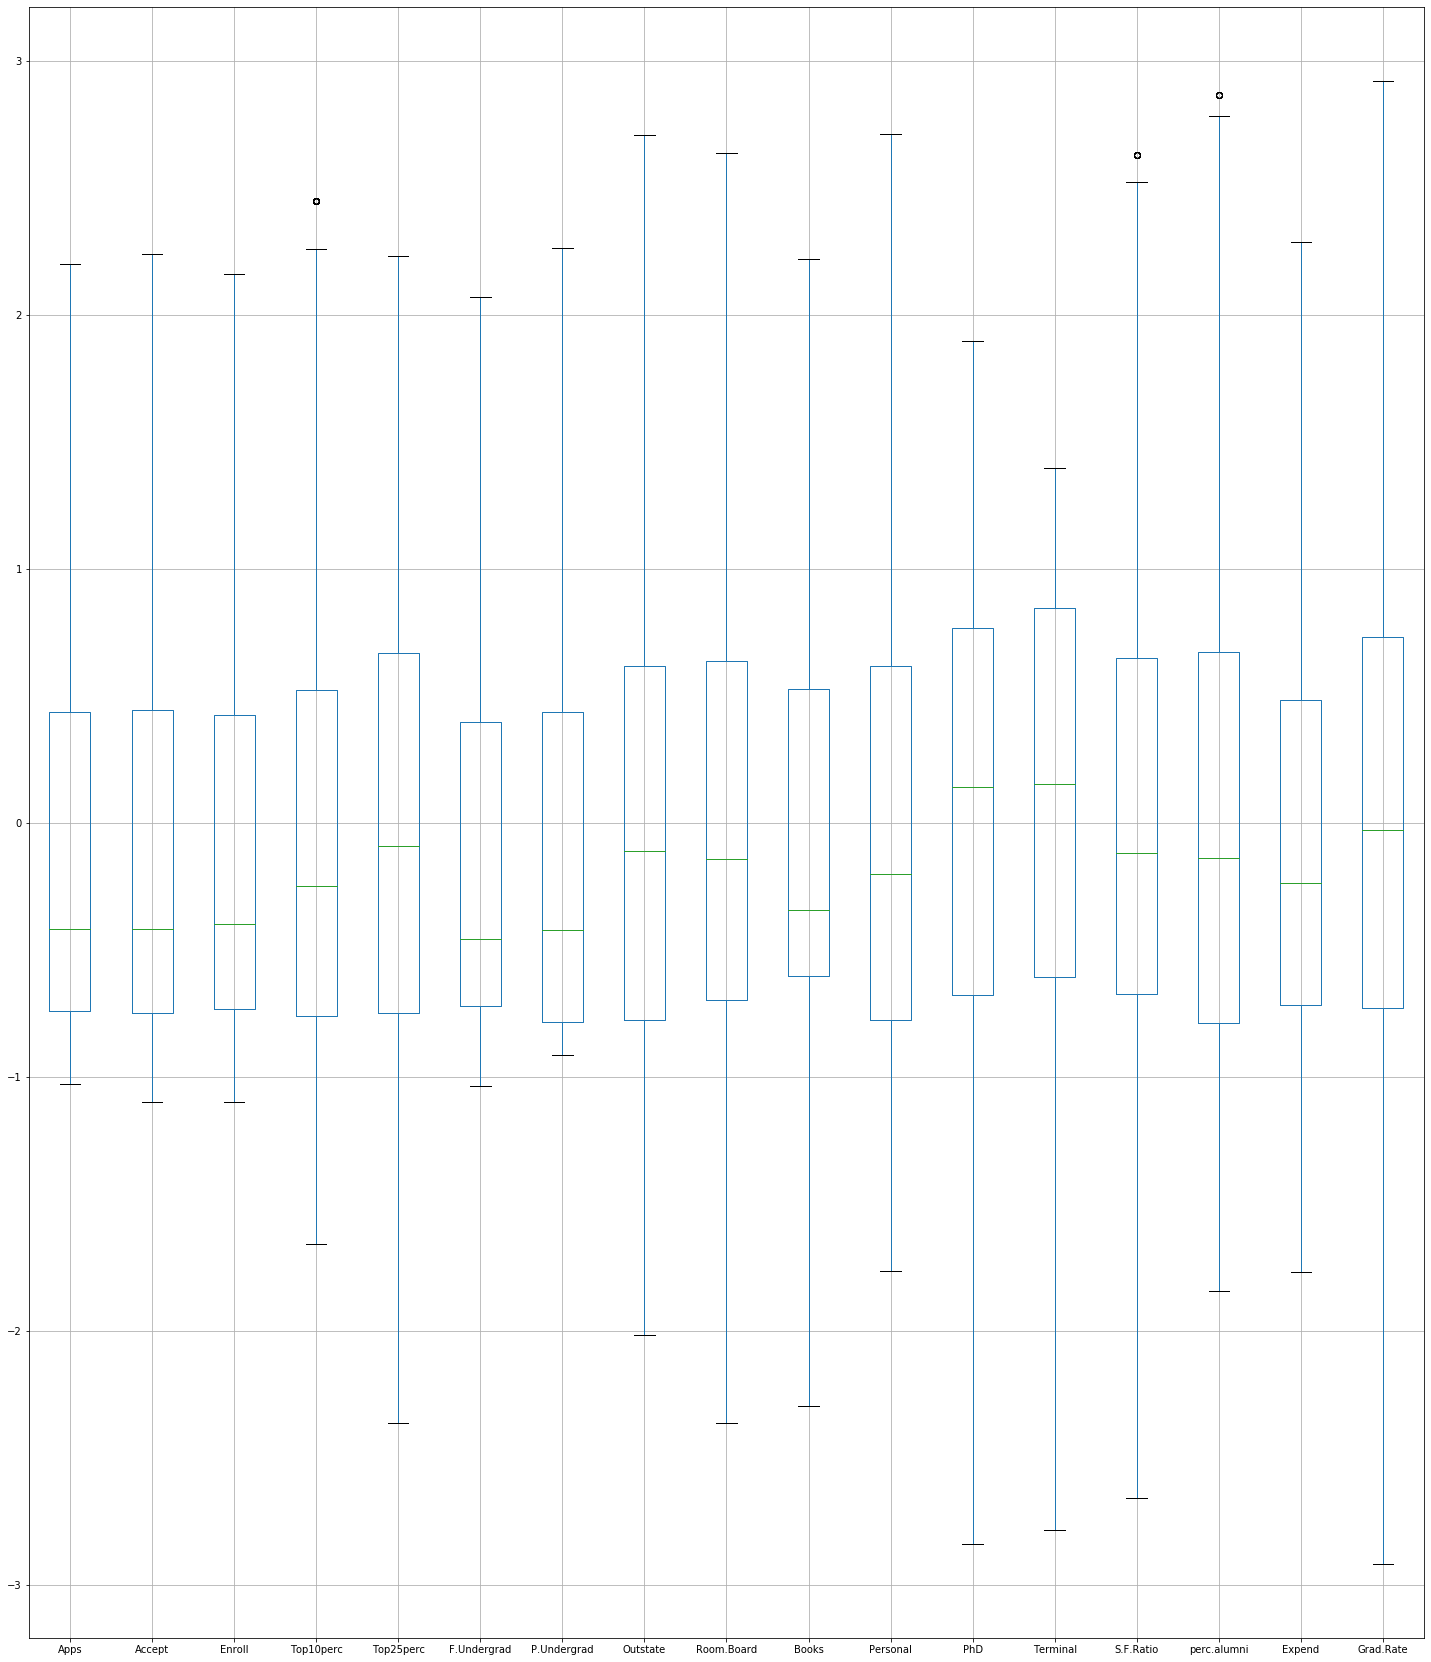

In [136]:
plt.subplots(figsize=(25,30))
hg.boxplot(figsize=(25,20))

In [106]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [122]:
lApps,uApps=remove_outlier(hg['Apps'])
hg['Apps']=np.where(hg['Apps']>uApps,uApps,hg['Apps'])
hg['Apps']=np.where(hg['Apps']<lApps,lApps,hg['Apps'])

lAccept,uAccept=remove_outlier(hg['Accept'])
hg['Accept']=np.where(hg['Accept']>uAccept,uAccept,hg['Accept'])
hg['Accept']=np.where(hg['Accept']<lAccept,lAccept,hg['Accept'])

lEnroll,uEnroll=remove_outlier(hg['Enroll'])
hg['Enroll']=np.where(hg['Enroll']>uEnroll,uEnroll,hg['Enroll'])
hg['Enroll']=np.where(hg['Enroll']<lEnroll,lEnroll,hg['Enroll'])

lTop10perc,uTop10perc=remove_outlier(hg['Top10perc'])
hg['Top10perc']=np.where(hg['Top10perc']>uTop10perc,uTop10perc,hg['Top10perc'])
hg['Top10perc']=np.where(hg['Apps']<lTop10perc,lTop10perc,hg['Top10perc'])


lF_undergrad,uF_undergrad=remove_outlier(hg['F.Undergrad'])
hg['F.Undergrad']=np.where(hg['F.Undergrad']>uF_undergrad,uF_undergrad,hg['F.Undergrad'])
hg['F.Undergrad']=np.where(hg['F.Undergrad']<lF_undergrad,lF_undergrad,hg['F.Undergrad'])


lP_undergrad,uP_undergrad=remove_outlier(hg['P.Undergrad'])
hg['P.Undergrad']=np.where(hg['P.Undergrad']>uP_undergrad,uP_undergrad,hg['P.Undergrad'])
hg['P.Undergrad']=np.where(hg['P.Undergrad']<lP_undergrad,lP_undergrad,hg['P.Undergrad'])


lOutstate,uOutstate=remove_outlier(hg['Outstate'])
hg['Outstate']=np.where(hg['Outstate']>uOutstate,uOutstate,hg['Outstate'])
hg['Outstate']=np.where(hg['Outstate']<lOutstate,lOutstate,hg['Outstate'])

lRoom_Board,uRoom_Board=remove_outlier(hg['Room.Board'])
hg['Room.Board']=np.where(hg['Room.Board']>uRoom_Board,uRoom_Board,hg['Room.Board'])
hg['Room.Board']=np.where(hg['Room.Board']<lRoom_Board,lRoom_Board,hg['Room.Board'])


lBooks,uBooks=remove_outlier(hg['Books'])
hg['Books']=np.where(hg['Books']>uBooks,uBooks,hg['Books'])
hg['Books']=np.where(hg['Books']<lBooks,lBooks,hg['Books'])


lPersonal,uPersonal=remove_outlier(hg['Personal'])
hg['Personal']=np.where(hg['Personal']>uPersonal,uPersonal,hg['Personal'])
hg['Personal']=np.where(hg['Personal']<lPersonal,lPersonal,hg['Personal'])


lPhD,uPhD=remove_outlier(hg['PhD'])
hg['PhD']=np.where(hg['PhD']>uPhD,uPhD,hg['PhD'])
hg['PhD']=np.where(hg['PhD']<lPhD,lPhD,hg['PhD'])


lTerminal,uTerminal=remove_outlier(hg['Terminal'])
hg['Terminal']=np.where(hg['Terminal']>uTerminal,uTerminal,hg['Terminal'])
hg['Terminal']=np.where(hg['Terminal']<lTerminal,lTerminal,hg['Terminal'])

lS_F_Ratio,uS_F_Ratio=remove_outlier(hg['S.F.Ratio'])
hg['S.F.Ratio']=np.where(hg['S.F.Ratio']>uS_F_Ratio,uS_F_Ratio,hg['S.F.Ratio'])
hg['S.F.Ratio']=np.where(hg['S.F.Ratio']<lS_F_Ratio,lS_F_Ratio,hg['S.F.Ratio'])

lperc_alumni,uperc_alumni=remove_outlier(hg['perc.alumni'])
hg['perc.alumni']=np.where(hg['perc.alumni']>uperc_alumni,uperc_alumni,hg['perc.alumni'])
hg['perc.alumni']=np.where(hg['perc.alumni']<lperc_alumni,lperc_alumni,hg['perc.alumni'])

lExpend,uExpend=remove_outlier(hg['Expend'])
hg['Expend']=np.where(hg['Expend']>uExpend,uExpend,hg['Expend'])
hg['Expend']=np.where(hg['Expend']<lExpend,lExpend,hg['Expend'])

lGrad_Rate,uGrad_Rate=remove_outlier(hg['Grad.Rate'])
hg['Grad.Rate']=np.where(hg['Grad.Rate']>uGrad_Rate,uGrad_Rate,hg['Grad.Rate'])
hg['Grad.Rate']=np.where(hg['Grad.Rate']<lGrad_Rate,lGrad_Rate,hg['Grad.Rate'])

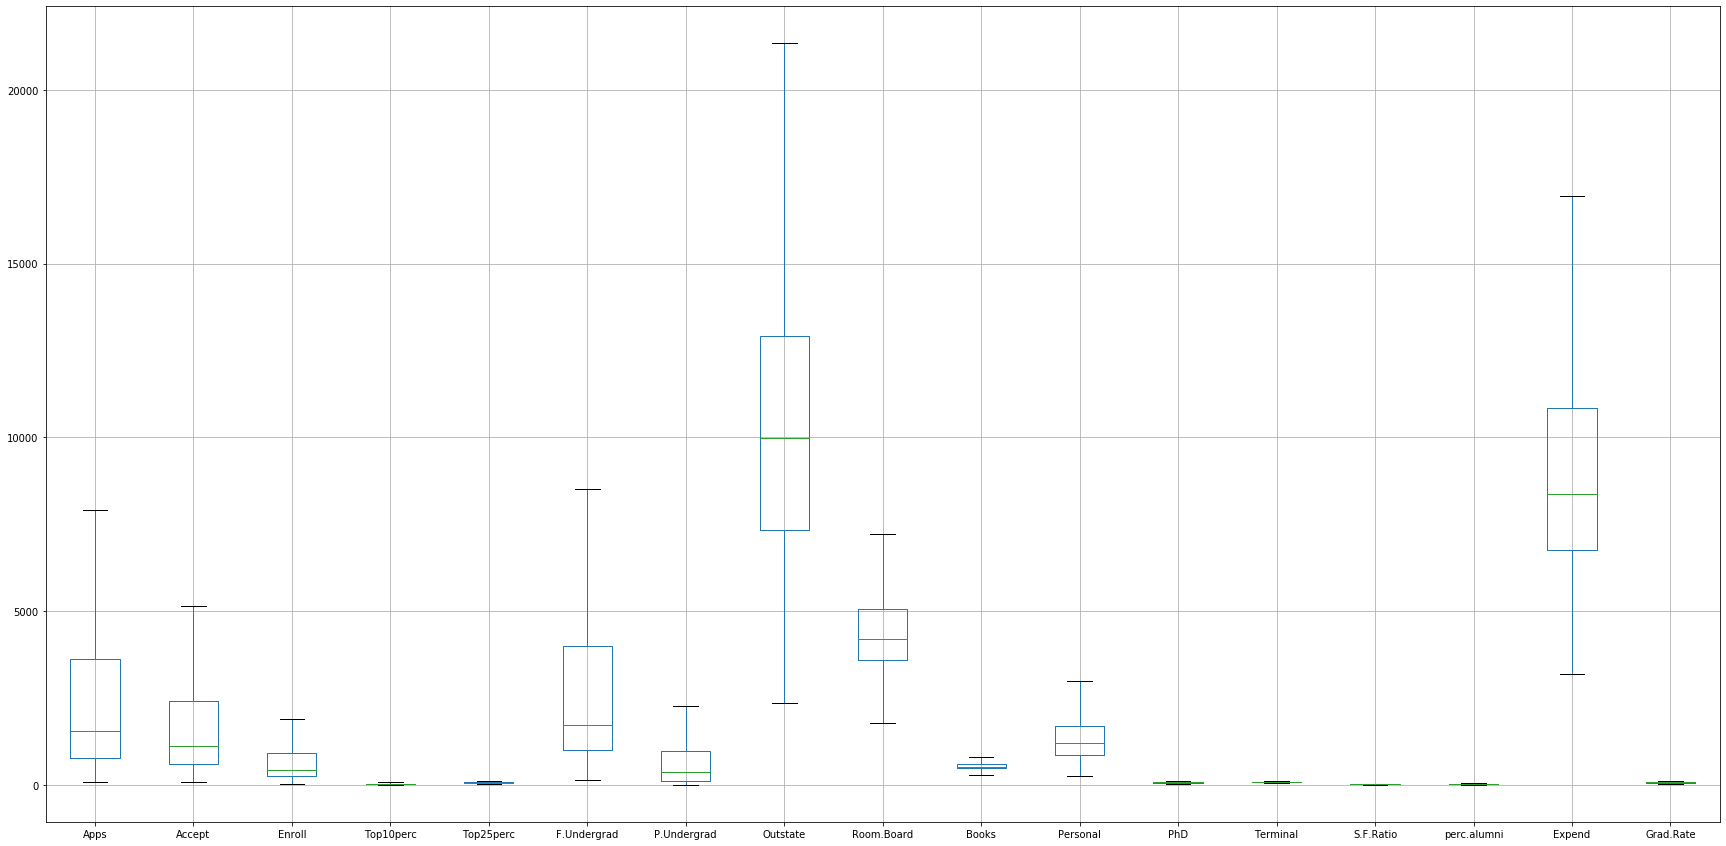

In [123]:
plt.subplots(figsize=(30,15))
hg.boxplot(figsize=(30,15))

In [126]:
hg.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660.0,1232.0,721.0,23.0,52,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,2186.0,1924.0,512.0,16.0,29,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,39.5,12.2,16.0,10527.0,56.0
2,1428.0,1097.0,336.0,22.0,50,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,417.0,349.0,137.0,60.0,89,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,16948.5,59.0
4,193.0,146.0,55.0,16.0,44,249.0,869.0,7560.0,4120.0,795.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.5


# 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.¶

In [128]:
from scipy.stats import zscore
nk=hg.apply(zscore)
nk.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.376493,-0.337830,0.106380,-0.246780,-0.191827,-0.018769,-0.166083,-0.746480,-0.968324,-0.776567,1.438500,-0.174045,-0.123239,1.070602,-0.870466,-0.630916,-0.319205
1,-0.159195,0.116744,-0.260441,-0.696290,-1.353911,-0.093626,0.797856,0.457762,1.921680,1.828605,0.289289,-2.745731,-2.785068,-0.489511,-0.545726,0.396097,-0.552693
2,-0.472336,-0.426511,-0.569343,-0.310996,-0.292878,-0.703966,-0.777974,0.201488,-0.555466,-1.210762,-0.260691,-1.240354,-0.952900,-0.304413,0.590864,-0.131845,-0.669437
3,-0.889994,-0.917871,-0.918613,2.129202,1.677612,-0.898889,-0.828267,0.626954,1.004218,-0.776567,-0.736792,1.205884,1.190391,-1.679429,1.159159,2.287940,-0.377577
4,-0.982532,-1.051221,-1.062533,-0.696290,-0.596031,-0.995610,0.297726,-0.716623,-0.216006,2.219381,0.289289,0.202299,-0.538069,-0.568839,-1.682316,0.512468,-2.916759


# We prefer standardization instead of Min-Max scaling, since we are interested in those components that maximize the variance.

# 2.3) Comment on the comparison between covariance and the correlation matrix.

In [131]:
cov_matrix = np.cov(nk.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [132]:
df_corr = hg.copy()
df_corr.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


In [133]:
nk.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.955307,0.896883,0.321342,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.463924,0.434478,0.126411,-0.101158,0.242935,0.150803
Accept,0.955307,1.000000,0.935277,0.223298,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.427341,0.403409,0.188506,-0.165516,0.161808,0.078982
Enroll,0.896883,0.935277,1.000000,0.171756,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.381540,0.354379,0.274269,-0.222723,0.054221,-0.023251
Top10perc,0.321342,0.223298,0.171756,1.000000,0.913875,0.111215,-0.180009,0.562160,0.357366,0.153452,-0.116730,0.544048,0.506748,-0.387926,0.455797,0.657039,0.493670
Top25perc,0.364491,0.273681,0.230434,0.913875,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.551461,0.527654,-0.297233,0.416832,0.572905,0.478985
F.Undergrad,0.861002,0.897034,0.967302,0.111215,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.361564,0.335054,0.324504,-0.285457,0.000371,-0.082239
P.Undergrad,0.519823,0.572691,0.641595,-0.180009,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127663,0.122152,0.370607,-0.419334,-0.201929,-0.265158
Outstate,0.065337,-0.005002,-0.155655,0.562160,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.391321,0.412579,-0.573683,0.565736,0.775328,0.572458
Room.Board,0.187475,0.119586,-0.023846,0.357366,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.341469,0.379270,-0.376430,0.272393,0.580622,0.425790
Books,0.236138,0.208705,0.202057,0.153452,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.136390,0.159318,-0.008536,-0.042832,0.149983,-0.008051


# “Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.Correlation is a function of the covariance. You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.

We can state that above three approaches yield the same eigenvectors and eigenvalue pairs:

1.Eigen decomposition of the covariance matrix after standardizing the data.

2.Eigen decomposition of the correlation matrix.

3.Eigen decomposition of the correlation matrix after standardizing the data.

Finally we can say that after scaling - the covariance and the correlation have the same values

# 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

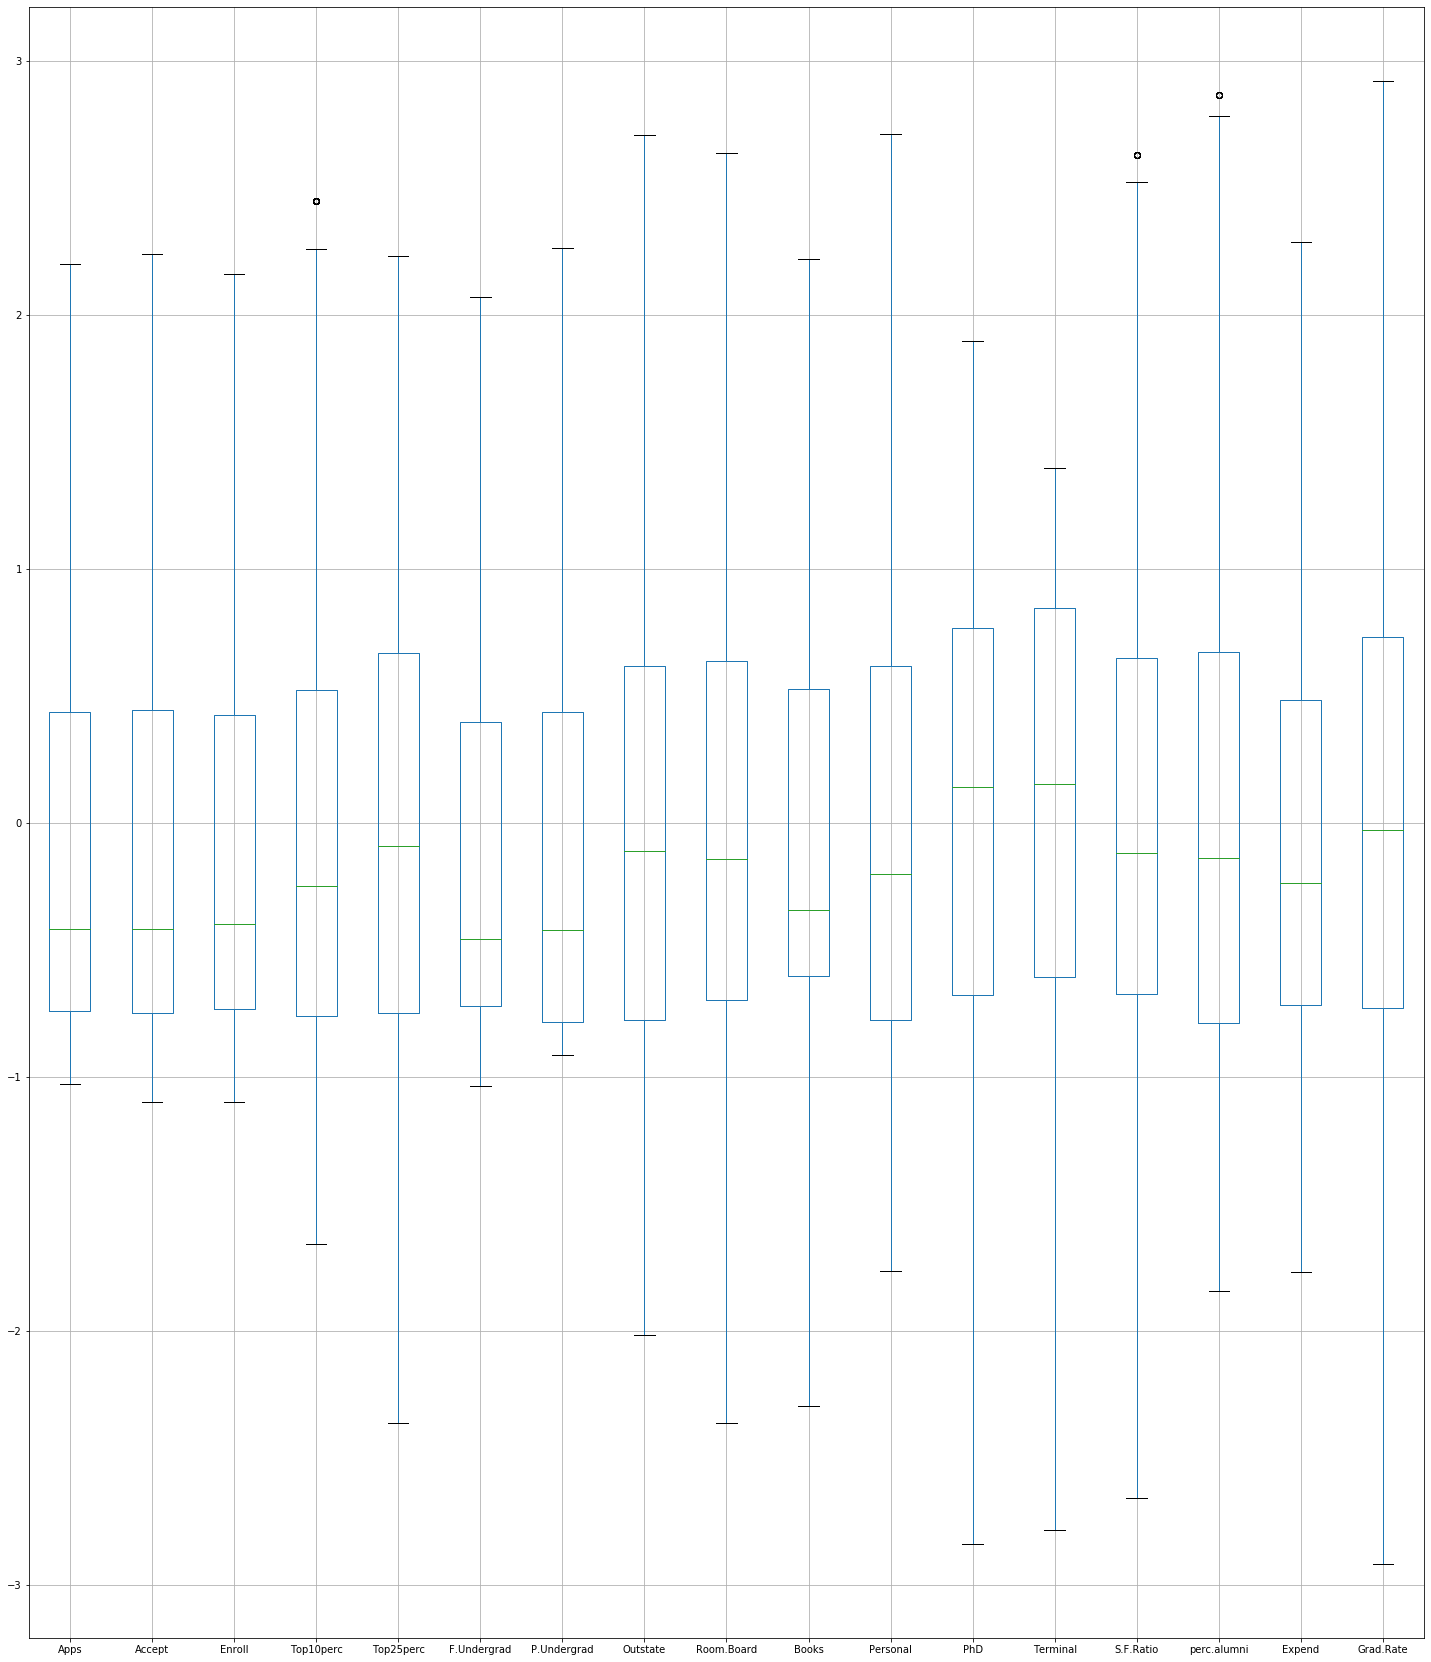

In [137]:
plt.subplots(figsize=(25,30))
hg.boxplot(figsize=(25,20))

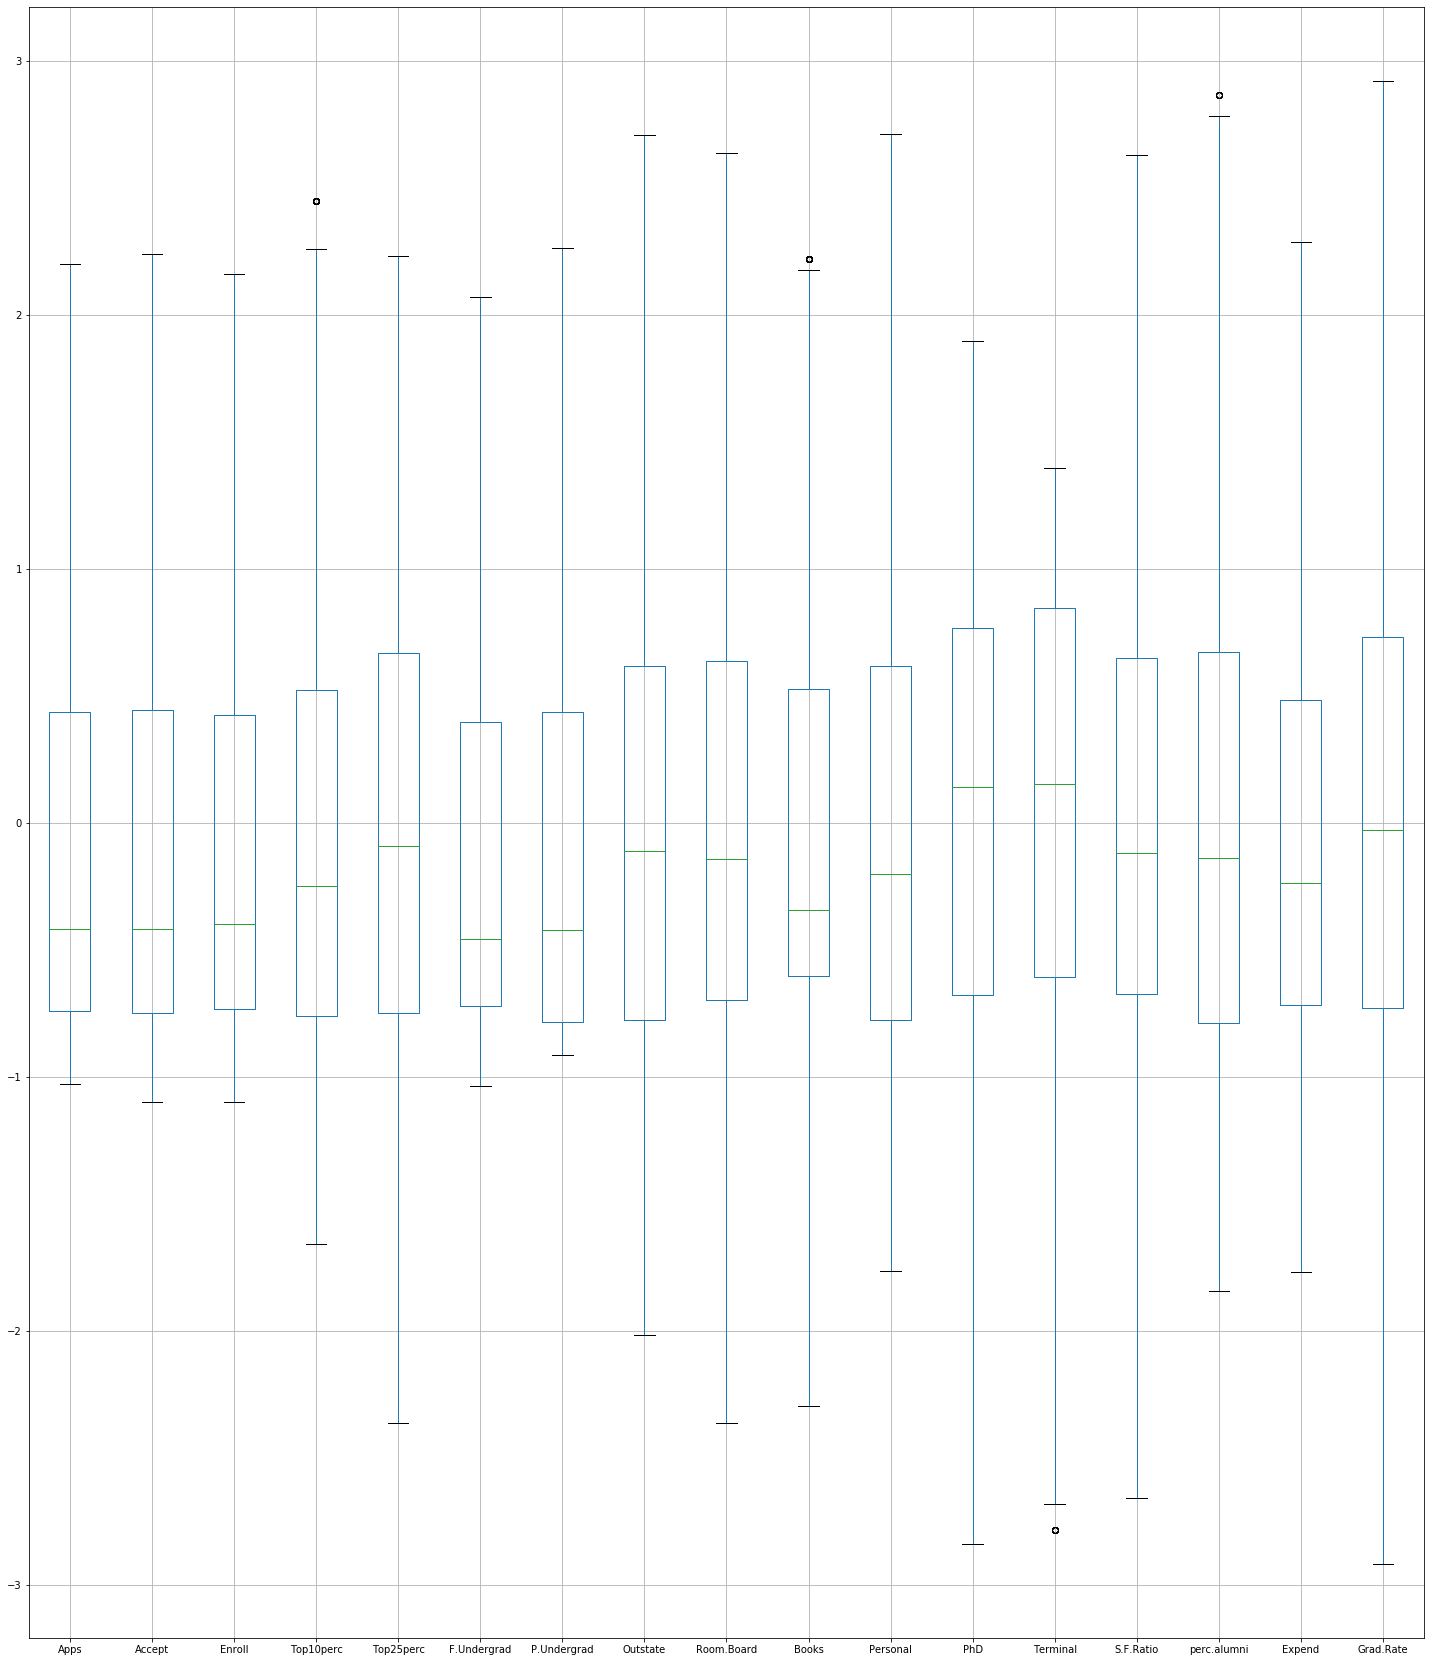

In [138]:
plt.subplots(figsize=(25,30))
nk.boxplot(figsize=(25,20))

# If we observed,we find our data have still outliers in some variables,as per my knowledge its due to scaling process ,In that process the value get changed in some variable and that is the reason the emergence of outliers in the data  

# 2.5) Build the covariance matrix, eigenvalues and eigenvector.

# In kernel line 131 we have already done the function co-variance matrix

In [134]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)



 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]
Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01 -8.10177245e-02  9.87761685e-02
   2.19898081e-01 -2.18800617e-03  2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02 -8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01 -1.07658626e-01  1.18140437e-01
   1.89634940e-01  1.65212882e-02  1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01 -4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01 -8.55296892e-02  9.30717094e-03
   1.62314818e-01  6.80794143e-02  1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.33

# 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

In [135]:
pd.DataFrame(data=eig_vecs[0,:])

,0
0,-0.262172
1,0.314136
2,-0.081018
3,0.098776
4,0.219898
5,-0.002188
6,0.028372
7,-0.089950
8,0.130567
9,-0.156464


# 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

# Perform PCA and export the data of the Principal Component scores into a data frame.

The eigenvalues measure the amount of variation retained by each principal component. Eigenvalues are large for the first PCs and small for the subsequent PCs. That is, the first PCs corresponds to the directions with the maximum amount of variation in the data set.

The cumulative percentage is obtained by adding the successive proportions of variation explained to obtain the running total.

An eigenvalue > 1 indicates that PCs account for more variance than accounted by one of the original variables in standardized data. This is commonly used as a cutoff point for which PCs are retained.

You can also limit the number of component to that number that accounts for a certain fraction of the total variance. For example, if you are satisfied with 70% of the total variance explained then use the number of components to achieve that.

An alternative method to determine the number of principal components is to look at a Scree Plot, which is the plot of eigenvalues ordered from largest to the smallest. The number of component is determined at the point, beyond which the remaining eigenvalues are all relatively small and of comparable size

Given a square matrix, A, the eigenvectors tell you when the linear transformation represented by A acts like scalar multiplication.

In [157]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 17 to 6)

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(nk)
data_reduced

array([[-1.60249937,  0.99368301,  0.03004476, -1.00842242, -0.3668863 ,
        -0.69747577],
       [-1.80467545, -0.07041499,  2.12212752,  3.13894116,  2.45321197,
         0.99485844],
       [-1.60828257, -1.38279212, -0.50151255, -0.03637345,  0.76599686,
        -1.02623665],
       ...,
       [-0.57688267,  0.01779846,  0.32216034, -0.58725873,  0.17522461,
         0.50404278],
       [ 6.570952  , -1.18493014,  1.32596561,  0.07770702,  1.36851641,
        -0.82274543],
       [-0.47739307,  1.04394672, -1.42543835, -1.30027369,  0.72091759,
         1.05180972]])

In [159]:
gs = pd.DataFrame(data_reduced)
gs.columns = gs.columns+1
gs.index = gs.index + 1
gs

,1,2,3,4,5,6
1,-1.602499,0.993683,0.030045,-1.008422,-0.366886,-0.697476
2,-1.804675,-0.070415,2.122128,3.138941,2.453212,0.994858
3,-1.608283,-1.382792,-0.501513,-0.036373,0.765997,-1.026237
4,2.803644,-3.367395,0.367768,-0.632914,-1.192601,-1.457080
5,-2.200868,-0.099348,3.122523,0.657707,-1.828044,0.140915
...,...,...,...,...,...,...
773,-3.395392,1.995628,-0.744776,0.800067,-0.342732,0.573074
774,0.319750,-0.314944,0.013597,0.653856,0.462527,0.741736
775,-0.576883,0.017798,0.322160,-0.587259,0.175225,0.504043
776,6.570952,-1.184930,1.325966,0.077707,1.368516,-0.822745
